Muhammad Irfan Hilman

FTDS BATCH 16

# I. Perkenalan

Seorang data scientist ditugaskan utk membuat model clustering menggunakan 4 algoritma berbeda (k-MEans, DBScan, Spectral Clustering dan Agglomerative Clustering) untuk melakukan Customer Segmentation dari data kartu kredit sebuah bank. Dataset merupakan data informasi penggunaan kartu kredit selama 6 bulan terakhir. Dataset diekstrak dari Big Query menggunakan code berikut ini:

select *

from `ftds-hacktiv8-project.phase1_ftds_016_rmt.credit-card-information`

where mod(CUST_ID,2) = 0

Dataset diambil dari ftds-hacktiv8-project.phase1_ftds_016_rmt.credit-card-information menggunakan nomor Customer ID genap.

# II. Import Libraries

Cell pertama pada notebook harus berisi dan hanya berisi semua library yang digunakan dalam project.

In [1]:
# Install feature-engine utk load library Winsorizer
!pip install feature-engine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 290 kB 5.2 MB/s 


In [2]:
# Import semua library yg dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from feature_engine.outliers import Winsorizer
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, SpectralClustering, AgglomerativeClustering
from sklearn.metrics import silhouette_score

# III. Data Loading

Bagian ini berisi proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut. Proses Data Loading dapat berupa memberi nama baru untuk setiap kolom, mengecek ukuran dataset, dll.

In [3]:
# Load dataset dari github
df = pd.read_csv('https://raw.githubusercontent.com/IrfanHilman/FTDS_Hacktiv8_Batch_16/main/h8dsft_P1G4_Irfan_Hilman.csv')

In [4]:
# Pilih option tampilkan semua kolom
pd.options.display.max_columns = None

In [5]:
# Tampilkan 5 baris pertama df
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,788,16.581535,0.125,200.0,0.0,200.0,0.0,0.125,0.000,0.125,0.0,0,2,1200.0,0.000000,NaN,0.0,8
1,1902,943.584041,0.875,103.0,103.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1000.0,215.325023,410.484825,0.0,8
2,2322,1.979916,0.125,80.0,80.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1500.0,0.000000,NaN,0.0,8
3,3426,461.455720,1.000,585.0,585.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1000.0,258.032630,151.696433,0.0,8
4,3976,1053.594730,1.000,1450.0,1450.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1500.0,397.090516,227.143184,0.0,8


In [6]:
# Tampilkan 5 baris terakhir df
df.tail()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
4470,4630,1079.008102,1.000000,0.00,0.00,0.00,1259.571764,0.000000,0.000000,0.000000,0.545455,9,0,1200.0,1379.635287,271.364415,0.090909,11
4471,8614,809.582978,0.909091,0.00,0.00,0.00,3819.672466,0.000000,0.000000,0.000000,0.545455,7,0,4150.0,4372.148648,241.645387,0.090909,11
4472,4296,3386.490883,1.000000,560.98,427.22,133.76,2008.153534,1.000000,0.727273,0.363636,0.545455,9,20,10100.0,1039.000037,886.050237,0.000000,11
4473,4476,4840.545574,1.000000,1595.93,1595.93,0.00,4359.325750,0.454545,0.454545,0.000000,0.545455,17,25,6000.0,905.844846,2376.919568,0.090909,11
4474,3564,1977.007090,1.000000,1032.04,226.90,805.14,4335.919227,0.909091,0.090909,0.818182,0.545455,21,17,4000.0,3056.424974,910.707525,0.090909,11


In [7]:
# Tampilkan datatype dan jumlah baris pada df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4475 entries, 0 to 4474
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           4475 non-null   int64  
 1   BALANCE                           4475 non-null   float64
 2   BALANCE_FREQUENCY                 4475 non-null   float64
 3   PURCHASES                         4475 non-null   float64
 4   ONEOFF_PURCHASES                  4475 non-null   float64
 5   INSTALLMENTS_PURCHASES            4475 non-null   float64
 6   CASH_ADVANCE                      4475 non-null   float64
 7   PURCHASES_FREQUENCY               4475 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        4475 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  4475 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            4475 non-null   float64
 11  CASH_ADVANCE_TRX                  4475 non-null   int64  
 12  PURCHA

In [8]:
# Tampilkan ukuran matriks df
df.shape

(4475, 18)

# IV. Exploratory Data Analysis (EDA)

Bagian ini berisi eksplorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.

Text(0.5, 1.0, 'Balance vs Purchases')

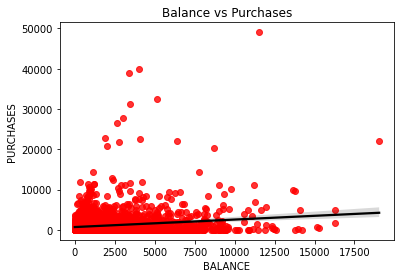

In [9]:
# Buat plot regresi dan scatter antara variabel BALANCE dan PURCHASES
sns.regplot(x = 'BALANCE', y='PURCHASES', data=df, scatter_kws={"color": "red"}, line_kws={"color": "black"})
plt.title('Balance vs Purchases')

Ada sedikit korelasi positif antara balance dgn purchases. Artinya, ada kecenderungan user utk membeli lbh banyak ketika nilai balance dlm rekening meningkat. Namun sebagian besar purchases dilakukan dibawah harga 10,000 USD.

Text(0.5, 1.0, 'Balance vs Cash Advance')

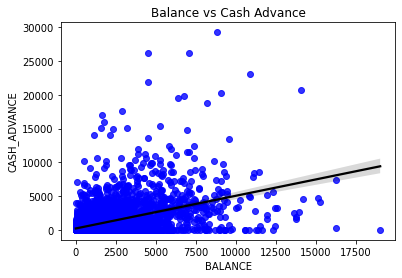

In [10]:
# Buat plot regresi dan scatter antara variabel BALANCE dan CASH_ADVANCE
sns.regplot(x = 'BALANCE', y='CASH_ADVANCE', data=df, color='b',scatter_kws={"color": "blue"}, line_kws={"color": "black"})
plt.title('Balance vs Cash Advance')

Terdapat korelasi positif antara balance dgn cash advance. Dgn kata lain, semakin besar balance di akun maka semakin besar cash advance yg diberikan

Text(0.5, 1.0, 'Balance vs Purchases Frequency')

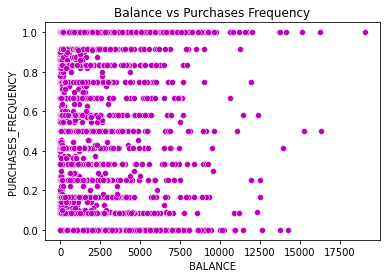

In [11]:
# Buat plot scatter antara variabel BALANCE dan PURCHASES_FREQUENCY
sns.scatterplot(x = 'BALANCE', y='PURCHASES_FREQUENCY', data=df, color='m')
plt.title('Balance vs Purchases Frequency')

Tidak terdapat korelasi antara balance dgn frekuensi pembelian. 

Text(0.5, 1.0, 'Balance vs Purchases Transactions')

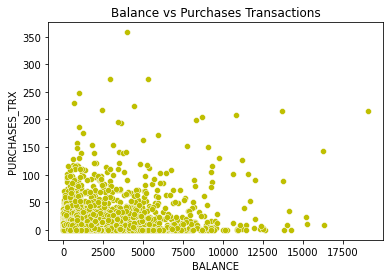

In [12]:
# Buat plot scatter antara variabel BALANCE dan PURCHASES_TRX
sns.scatterplot(x = 'BALANCE', y='PURCHASES_TRX', data=df, color='y')
plt.title('Balance vs Purchases Transactions')

Sebagian besar data terkonsentrasi pada low balance dan low purchases transaction. 

Text(0.5, 1.0, 'Balance vs Credit Limit')

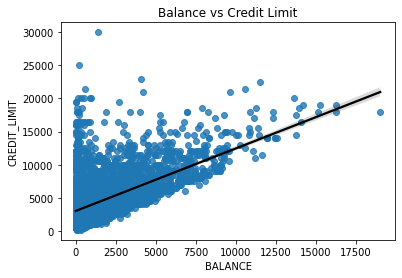

In [13]:
# Buat plot regresi dan scatter antara variabel BALANCE dan CREDIT_LIMIT
sns.regplot(x = 'BALANCE', y='CREDIT_LIMIT', data=df, line_kws={"color": "black"})
plt.title('Balance vs Credit Limit')

Terdapat korelasi positif antara balance dgn limit kredit. Semakin besar balance maka semakin besar limit kredit yg bisa diberikan. Namun ada juga user2 dgn balance sedikit namun dapat memiliki credit limit cukup besar, yakni diatas 10,000 USD.

Text(0.5, 1.0, 'Balance vs Payments')

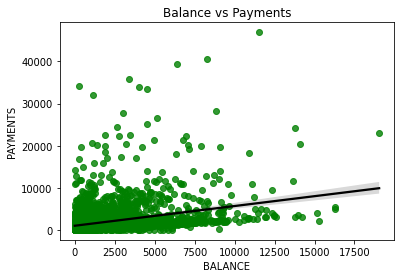

In [14]:
# Buat plot regresi dan scatter antara variabel BALANCE dan PAYMENTS
sns.regplot(x = 'BALANCE', y='PAYMENTS', data=df, scatter_kws={"color": "green"}, line_kws={"color": "black"})
plt.title('Balance vs Payments')

Terdapat korelasi positif antara balance dgn jumlah payment yg dilakukan, meskipun data terkonsentrasi pada low balance dan low payment

Text(0.5, 1.0, 'Balance vs Minimum Payments')

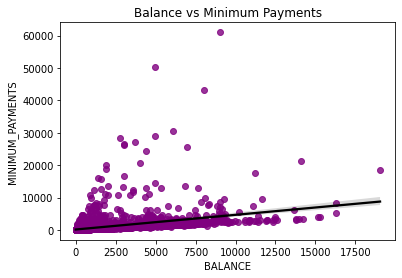

In [15]:
# Buat plot regresi dan scatter antara variabel BALANCE dan MINIMUM_PAYMENTS
sns.regplot(x = 'BALANCE', y='MINIMUM_PAYMENTS', data=df, scatter_kws={"color": "purple"}, line_kws={"color": "black"})
plt.title('Balance vs Minimum Payments')

Terdapat korelasi positif antara low balance dan minimum payment. Namun, pertambahan jumlah balance hanya menghasilkan sedikit pertambahan jumlah minimum payment. Artinya user lbh suka membayar sesedikit mungkin (sebanyak minimum payment) pada revolving loan sebelum jatuh tempo.

Text(0.5, 1.0, 'Balance vs Percent Full Payment')

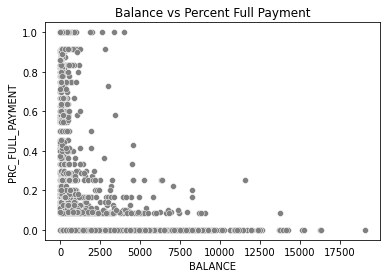

In [16]:
# Buat plot scatter antara variabel BALANCE dan PRC_FULL_PAYMENT
sns.scatterplot(x = 'BALANCE', y='PRC_FULL_PAYMENT', data=df, color='grey')
plt.title('Balance vs Percent Full Payment')

Tidak terdapat korelasi antara balance dgn full payment. Namun, komposisi nasabah yg tidak membayar full (0%) jauh lebih banyak.

Text(0.5, 1.0, 'Purchases vs Cash Advance')

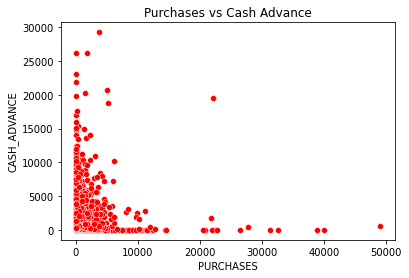

In [17]:
# Buat plot scatter antara variabel PURCHASES dan CASH_ADVANCE
sns.scatterplot(x = 'PURCHASES', y='CASH_ADVANCE', data=df, color='red')
plt.title('Purchases vs Cash Advance')

Sebagian besar data terkonsentrasi pada Purchases dgn nilai rendah. Jumlah cash advance dapat cukup besar pada purchases dgn nilai rendah

Text(0.5, 1.0, 'Purchases vs Purchases Frequency')

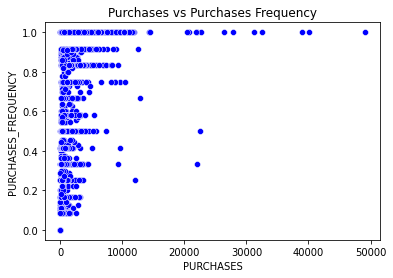

In [18]:
# Buat plot scatter antara variabel PURCHASES dan PURCHASES_FREQUENCY
sns.scatterplot(x = 'PURCHASES', y='PURCHASES_FREQUENCY', data=df, color='blue')
plt.title('Purchases vs Purchases Frequency')

Jumlah Purchases tidak berkorelasi dgn frekuensi purchases. Namun frekuensi purchases pada nilai purchases rendah cukup banyak

Text(0.5, 1.0, 'Purchases vs Purchases Transactions')

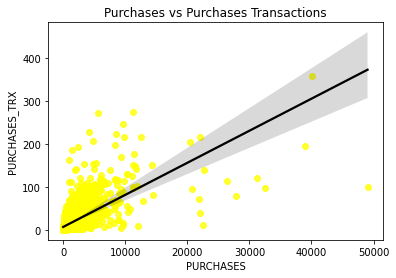

In [19]:
# Buat plot regresi dan scatter antara variabel PURCHASES dan PURCHASES_TRX
sns.regplot(x = 'PURCHASES', y='PURCHASES_TRX', data=df, scatter_kws={"color": "yellow"}, line_kws={"color": "black"})
plt.title('Purchases vs Purchases Transactions')

Jumlah nilai purchases sangat berkorelasi positif dgn jumlah transaksi purchases. Namun data hanya terkonsentrasi pada low purchases dan low transaction.

Text(0.5, 1.0, 'Purchases vs Credit Limit')

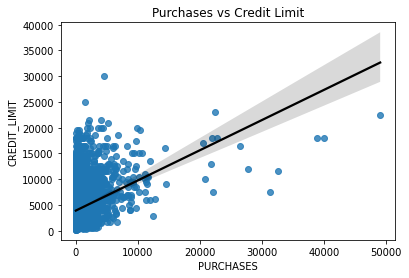

In [20]:
# Buat plot regresi dan scatter antara variabel PURCHASES dan CREDIT_LIMIT
sns.regplot(x = 'PURCHASES', y='CREDIT_LIMIT', data=df, line_kws={"color": "black"})
plt.title('Purchases vs Credit Limit')

Jumlah nilai purchases berkorelasi positif dgn jumlah transaksi purchases. Namun data hanya terkonsentrasi pada low purchases. User dgn low purchases dapat memiliki credit limit cukup besar.

Text(0.5, 1.0, 'Purchases vs Payments')

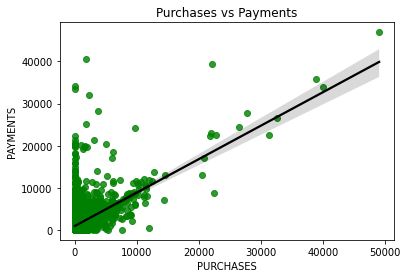

In [21]:
# Buat plot regresi dan scatter antara variabel PURCHASES dan PAYMENTS
sns.regplot(x = 'PURCHASES', y='PAYMENTS', data=df, scatter_kws={"color": "green"}, line_kws={"color": "black"})
plt.title('Purchases vs Payments')

Jumlah nilai purchases berbanding lurus dgn jumlah payments yg diberikan. Namun, jumlah payment cukup besar dapat terjadi pada jumlah purchases yg kecil. Cukup banyak payment yg dilakukan pada user yg tidak memiliki pembelian (purchases = 0).

Text(0.5, 1.0, 'Purchases vs Minimum Payments')

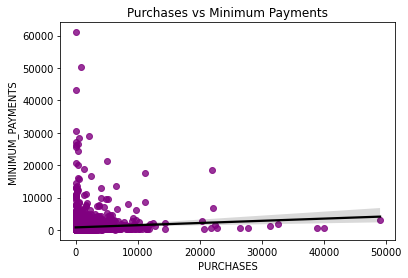

In [22]:
# Buat plot regresi dan scatter antara variabel PURCHASES dan MINIMUM_PAYMENTS
sns.regplot(x = 'PURCHASES', y='MINIMUM_PAYMENTS', data=df, scatter_kws={"color": "purple"}, line_kws={"color": "black"})
plt.title('Purchases vs Minimum Payments')

Jumlah purchases sedikit berkorelasi positif dgn jumlah pembayaran minimum. Sebagian besar jumlah pembayaran minimum berada dibawah angka 10,000 USD.

Text(0.5, 1.0, 'Purchases vs Percent Full Payment')

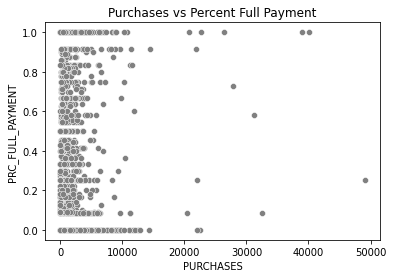

In [23]:
# Buat plot regresi dan scatter antara variabel PURCHASES dan PRC_FULL_PAYMENTS
sns.scatterplot(x = 'PURCHASES', y='PRC_FULL_PAYMENT', data=df, color='grey')
plt.title('Purchases vs Percent Full Payment')

Jumlah purchases tdk berkorelasi dgn persentase full payment.

Text(0.5, 1.0, 'Payments vs Cash Advance')

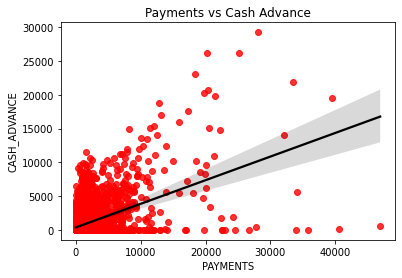

In [24]:
# Buat plot regresi dan scatter antara variabel PAYMENTS dan CASH_ADVANCE
sns.regplot(x = 'PAYMENTS', y='CASH_ADVANCE', data=df, scatter_kws={"color": "red"}, line_kws={"color": "black"})
plt.title('Payments vs Cash Advance')

Jumlah payments berkorelasi positif terhadap jumlah cash advance. Namun, data terkonsentrasi pada low payments dan low cash advance.

Text(0.5, 1.0, 'Payments vs Purchases Frequency')

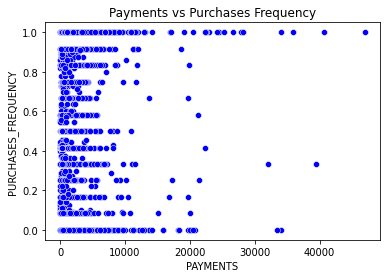

In [25]:
# Buat plot scatter antara variabel PAYMENTS dan PURCHASES_FREQUENCY
sns.scatterplot(x = 'PAYMENTS', y='PURCHASES_FREQUENCY', data=df, color='blue')
plt.title('Payments vs Purchases Frequency')

Jumlah payments tdk berkorelasi dgn purchases frequency.

Text(0.5, 1.0, 'Payments vs Purchases Transactions')

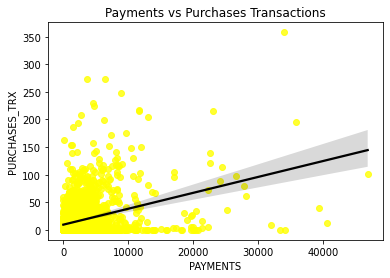

In [26]:
# Buat plot regresi dan scatter antara variabel PAYMENTS dan PURCHASES_TRX
sns.regplot(x = 'PAYMENTS', y='PURCHASES_TRX', data=df, scatter_kws={"color": "yellow"}, line_kws={"color": "black"})
plt.title('Payments vs Purchases Transactions')

Jumlah payments berbanding lurus dgn purchases transaction. Namun, data terkonsentrasi pada low payments dan low purchases transaction.

Text(0.5, 1.0, 'Payments vs Credit Limit')

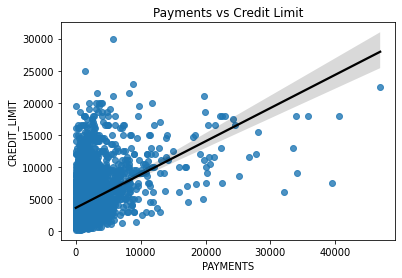

In [27]:
# Buat plot regresi dan scatter antara variabel PAYMENTS dan CREDIT_LIMIT
sns.regplot(x = 'PAYMENTS', y='CREDIT_LIMIT', data=df, line_kws={"color": "black"})
plt.title('Payments vs Credit Limit')

Jumlah payments berkorelasi kuat dgn besarnya credit limit. Namun, data terkonsentrasi pada low payments dan low credit limit. User yg tdk pernah melakukan pembayaran (payments = 0) dpt memiliki credit limit cukup besar.

Text(0.5, 1.0, 'Payments vs Minimum Payments')

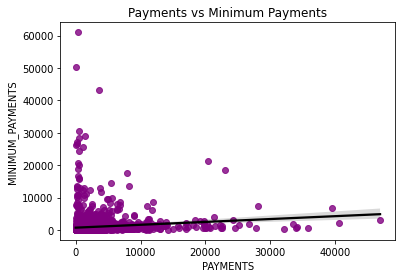

In [28]:
# Buat plot regresi dan scatter antara variabel PAYMENTS dan MINIMUM_PAYMENTS
sns.regplot(x = 'PAYMENTS', y='MINIMUM_PAYMENTS', data=df, scatter_kws={"color": "purple"}, line_kws={"color": "black"})
plt.title('Payments vs Minimum Payments')

Payments hampir tidak berkorelasi dgn minimum payments. Jumlah payment cukup besar dapat terjadi pada user yg tdk melakukan minimum payments. Sebaliknya, jumlah minimum payment cukup tinggi juga dapat terjadi pada user yg tidak melakukan payments.

Text(0.5, 1.0, 'Payments vs Percent Full Payment')

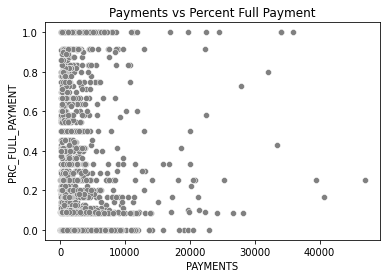

In [29]:
# Buat plot regresi dan scatter antara variabel PAYMENTS dan PRC_FULL_PAYMENT
sns.scatterplot(x = 'PAYMENTS', y='PRC_FULL_PAYMENT', data=df, color='grey')
plt.title('Payments vs Percent Full Payment')

Jumlah payments tdk berkorelasi pada persentase full payment.

Berikutnya kita akan melihat persebaran lama tenure credit card pada dataset.

<ipython-input-30-b0db5b80e71d>:9: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  plt.pie(pd.DataFrame(df['TENURE'].value_counts()),colors=palette_color, autopct='%.0f%%', wedgeprops={"edgecolor":"k"})


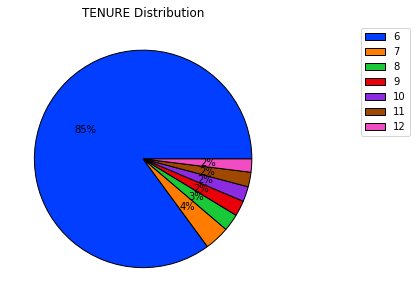

In [30]:
# Plot persebaran variabel Tenure pada dataset 
# Buat color palette dan label utk chart
palette_color = sns.color_palette('bright')
label1 = list(pd.DataFrame(df['TENURE'].value_counts()).sort_index().index)

# Buat figure dan plot pie chart
plt.figure(figsize = (5, 5))
plt.title('TENURE Distribution')
plt.pie(pd.DataFrame(df['TENURE'].value_counts()),colors=palette_color, autopct='%.0f%%', wedgeprops={"edgecolor":"k"})
plt.legend(label1, loc='upper right',bbox_to_anchor=(1.5,1))

plt.show()

Sebagian besar tenure (85%) terdapat pada angka 6 bulan.

Kesimpulan dari EDA adalah:

1. Balance memiliki korelasi lemah dgn purchases. Artinya user yg memiliki banyak balance di akunnya tidak serta merta menghabiskannya dgn membeli barang

2. Balance memiliki korelasi lemah dgn payment dan minimum payment, artinya biarpun user memiliki banyak balance di akunnya, user tetap menghabiskan sesedikit mungkin utk melakukan pembayaran

3. Balance memiliki korelasi kuat dgn credit limit. Artinya semakin besar balance nya, semakin besar credit limit yg bisa digunakan user

4. Purchases dan payment berkorelasi kuat dgn purchases transaction dan credit limit. Artinya, nilai pembelian berbanding dan pembayaran lurus dgn jumlah transaksi. Di sisi lain, semakin banyak pembelian dan pembayaran maka semakin besar credit limit yg diajukan. Bisa jadi user semakin rajin utk belanja ketika credit limit meningkat.

5. Payment tidak berkorelasi dgn minimum payment dan percent full payment. Artinya user lbh suka mencicil daripada membayar tunai.


# V. Data Preprocessing

Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-dev-test, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.

Kita ingin mengetahui jumlah missing values pada dataset

In [32]:
# Hitung jumlah missing values pada dataset df
df.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    158
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Terdapat 158 missing values pada kolom MINIMUM_PAYMENTS dan 1 missing values pada kolom CREDIT_LIMIT. Kita akan delete missing values tsb krn jumlahnya sedikit dibandingkan jumlah data keseluruhan

In [33]:
# Delete missing values pada df
df.dropna(inplace=True)

Berikutnya kita akan lakukan pemisahan antara training set dan testing set

In [34]:
# Buat dataset training (90%) dan inference (10%) melalui pemisahan secara random
X_train, X_inf= train_test_split(df, test_size = 0.1, random_state = 0)

Kita akan lakukan feature selection thd training set

In [35]:
# Hitung jumlah label pada kolom TENURE
X_train['TENURE'].value_counts()

12    3298
11     151
10     100
6       87
7       86
8       83
9       79
Name: TENURE, dtype: int64

Drop kolom TENURE krn merupakan data kategorikal

In [36]:
# Delete kolom tenure dari X_train
X_train_fs = X_train.drop(['TENURE'], axis=1)

Kita akan hitung skewness masing2 kolom

In [37]:
# Hitung nilai skewness
X_train_fs.skew()

CUST_ID                              0.001376
BALANCE                              2.480232
BALANCE_FREQUENCY                   -2.072113
PURCHASES                            8.921870
ONEOFF_PURCHASES                    10.201898
INSTALLMENTS_PURCHASES               8.159473
CASH_ADVANCE                         4.797204
PURCHASES_FREQUENCY                  0.035881
ONEOFF_PURCHASES_FREQUENCY           1.487259
PURCHASES_INSTALLMENTS_FREQUENCY     0.486590
CASH_ADVANCE_FREQUENCY               1.813906
CASH_ADVANCE_TRX                     4.865753
PURCHASES_TRX                        4.459001
CREDIT_LIMIT                         1.522784
PAYMENTS                             6.101321
MINIMUM_PAYMENTS                    12.528849
PRC_FULL_PAYMENT                     1.883425
dtype: float64

Sebagian besar merupakan data dgn distribusi skewed dgn nilai skewness >0.5. Oleh krn itu lakukan handling outliers dgn metode IQR. Handling menggunakan cara capping krn jumlah outliers cukup banyak sehingga tidak efisien jika dilakukan penghapusan

Lakukan handling outliers menggunakan fungsi windsorizer

In [38]:
# Definisikan model winsorizer
windsoriser = Winsorizer(capping_method='iqr', 
                          tail='both', 
                          fold=1.5)

# Fitting winsorizer ke dataset X_train_fs
windsoriser.fit(X_train_fs)

# Transformasi dataset X_train_fs menggunakan windsoriser
X_train_ho = windsoriser.transform(X_train_fs)

Cek data sebelum handling outliers

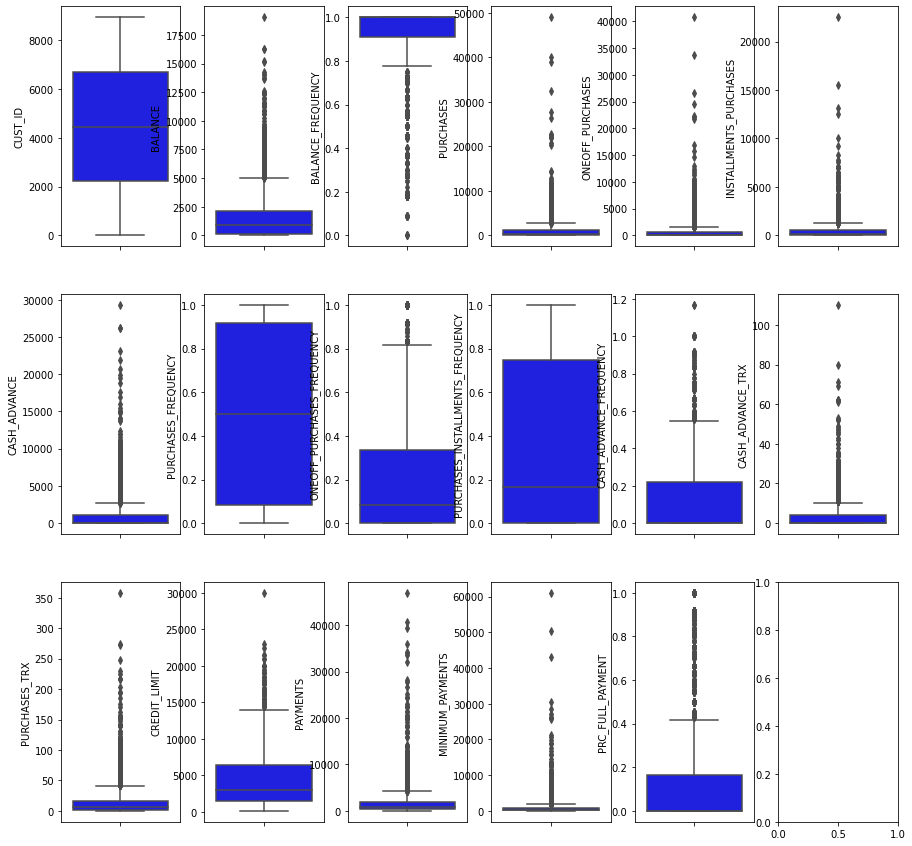

In [39]:
# plot data sblm winsorizer
f, axes = plt.subplots(3, 6, figsize=(15, 15))
sns.boxplot(y="CUST_ID", data=X_train_fs, ax=axes[0,0], color='b')
sns.boxplot(y="BALANCE", data=X_train_fs, ax=axes[0,1], color='b')
sns.boxplot(y="BALANCE_FREQUENCY", data=X_train_fs, ax=axes[0,2], color='b')
sns.boxplot(y="PURCHASES", data=X_train_fs, ax=axes[0,3], color='b')
sns.boxplot(y="ONEOFF_PURCHASES", data=X_train_fs, ax=axes[0,4], color='b')
sns.boxplot(y="INSTALLMENTS_PURCHASES", data=X_train_fs, ax=axes[0,5], color='b')
sns.boxplot(y="CASH_ADVANCE", data=X_train_fs, ax=axes[1,0], color='b')
sns.boxplot(y="PURCHASES_FREQUENCY", data=X_train_fs, ax=axes[1,1], color='b')
sns.boxplot(y="ONEOFF_PURCHASES_FREQUENCY", data=X_train_fs, ax=axes[1,2], color='b')
sns.boxplot(y="PURCHASES_INSTALLMENTS_FREQUENCY", data=X_train_fs, ax=axes[1,3], color='b')
sns.boxplot(y="CASH_ADVANCE_FREQUENCY", data=X_train_fs, ax=axes[1,4], color='b')
sns.boxplot(y="CASH_ADVANCE_TRX", data=X_train_fs, ax=axes[1,5], color='b')
sns.boxplot(y="PURCHASES_TRX", data=X_train_fs, ax=axes[2,0], color='b')
sns.boxplot(y="CREDIT_LIMIT", data=X_train_fs, ax=axes[2,1], color='b')
sns.boxplot(y="PAYMENTS", data=X_train_fs, ax=axes[2,2], color='b')
sns.boxplot(y="MINIMUM_PAYMENTS", data=X_train_fs, ax=axes[2,3], color='b')
sns.boxplot(y="PRC_FULL_PAYMENT", data=X_train_fs, ax=axes[2,4], color='b')
plt.show()

Cek data sesudah handling outliers

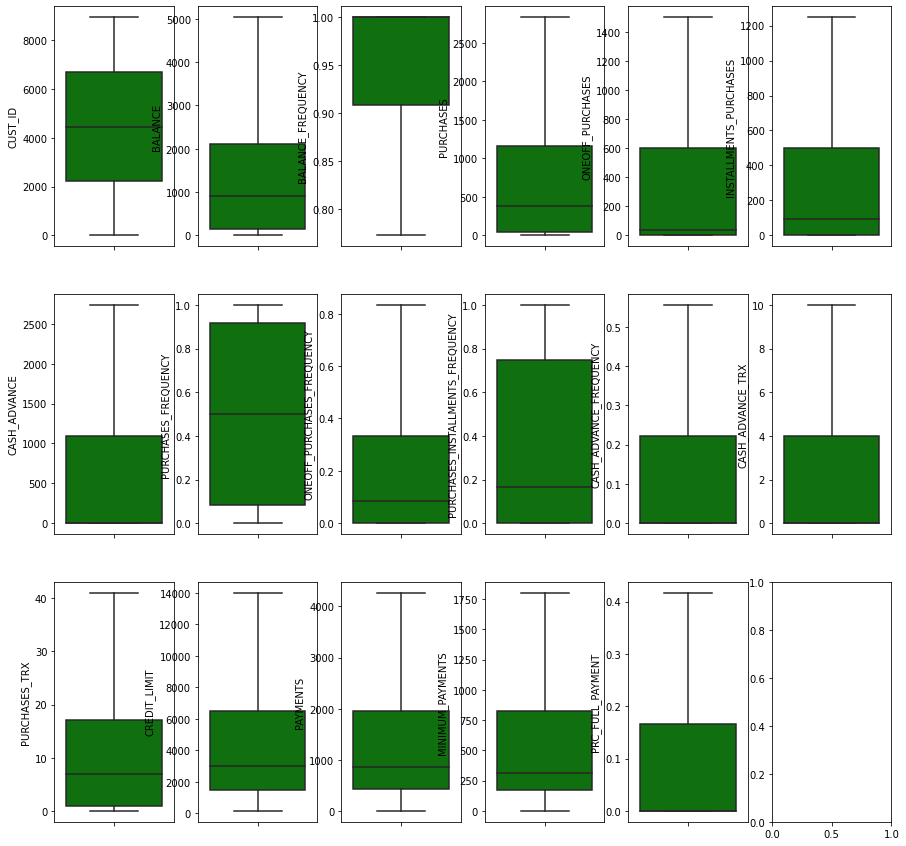

In [40]:
# plot data sesudah winsorizer
f, axes = plt.subplots(3, 6, figsize=(15, 15))
sns.boxplot(y="CUST_ID", data=X_train_ho, ax=axes[0,0], color='g')
sns.boxplot(y="BALANCE", data=X_train_ho, ax=axes[0,1], color='g')
sns.boxplot(y="BALANCE_FREQUENCY", data=X_train_ho, ax=axes[0,2], color='g')
sns.boxplot(y="PURCHASES", data=X_train_ho, ax=axes[0,3], color='g')
sns.boxplot(y="ONEOFF_PURCHASES", data=X_train_ho, ax=axes[0,4], color='g')
sns.boxplot(y="INSTALLMENTS_PURCHASES", data=X_train_ho, ax=axes[0,5], color='g')
sns.boxplot(y="CASH_ADVANCE", data=X_train_ho, ax=axes[1,0], color='g')
sns.boxplot(y="PURCHASES_FREQUENCY", data=X_train_ho, ax=axes[1,1], color='g')
sns.boxplot(y="ONEOFF_PURCHASES_FREQUENCY", data=X_train_ho, ax=axes[1,2], color='g')
sns.boxplot(y="PURCHASES_INSTALLMENTS_FREQUENCY", data=X_train_ho, ax=axes[1,3], color='g')
sns.boxplot(y="CASH_ADVANCE_FREQUENCY", data=X_train_ho, ax=axes[1,4], color='g')
sns.boxplot(y="CASH_ADVANCE_TRX", data=X_train_ho, ax=axes[1,5], color='g')
sns.boxplot(y="PURCHASES_TRX", data=X_train_ho, ax=axes[2,0], color='g')
sns.boxplot(y="CREDIT_LIMIT", data=X_train_ho, ax=axes[2,1], color='g')
sns.boxplot(y="PAYMENTS", data=X_train_ho, ax=axes[2,2], color='g')
sns.boxplot(y="MINIMUM_PAYMENTS", data=X_train_ho, ax=axes[2,3], color='g')
sns.boxplot(y="PRC_FULL_PAYMENT", data=X_train_ho, ax=axes[2,4], color='g')
plt.show()

Tidak ditemukan outliers pada data sesudah handling outliers. Berikutnya lakukan proses scaling menggunakan MinMaxScaler krn data berbentuk skewed

In [41]:
# Lakukan MinMaxScaler
scaler = MinMaxScaler()
X_train_sc = scaler.fit_transform(X_train_ho)

Tambahkan nama kolom pada data hasil scaling

In [42]:
# Tambahkan nama kolom
X_train_sc = pd.DataFrame(X_train_sc, columns = X_train_ho.columns)

Berikutnya lakukan proses VIF pada dataset utk menentukan korelasi satu variabel dgn grup variabel sisanya.

In [43]:
# Definisikan fungsi VIF
def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

Hitung nilai VIF masing2 kolom

In [44]:
# Hitung VIF utk dataset training
calc_vif(X_train_sc)

,variables,VIF
0,CUST_ID,3.028010
1,BALANCE,10.139256
2,BALANCE_FREQUENCY,5.074077
3,PURCHASES,28.176233
4,ONEOFF_PURCHASES,15.823818
5,INSTALLMENTS_PURCHASES,11.673023
6,CASH_ADVANCE,5.129437
7,PURCHASES_FREQUENCY,25.543701
8,ONEOFF_PURCHASES_FREQUENCY,9.639081
9,PURCHASES_INSTALLMENTS_FREQUENCY,21.929080


Nilai VIF > 5 ditentukan sebagai thresold dimana variabel dianggap berkorelasi dgn variabel lainnya sehingga menimbulkan multicollinearity. Kolom2 tsb akan dihapus krn membuat pemodelan tdk efisien

In [45]:
# Hapus kolom2 dgn nilai VIF diatas 0.5
X_train_vif = X_train_sc.drop(['BALANCE','BALANCE_FREQUENCY','PURCHASES','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES','CASH_ADVANCE','PURCHASES_FREQUENCY',
                                       'PURCHASES_INSTALLMENTS_FREQUENCY','CASH_ADVANCE_FREQUENCY','CASH_ADVANCE_TRX','PURCHASES_TRX'], axis=1)

Cek ulang VIF setelah penghapusan

In [46]:
# Hitung ulang VIF
calc_vif(X_train_vif)

,variables,VIF
0,CUST_ID,2.302758
1,ONEOFF_PURCHASES_FREQUENCY,1.816270
2,CREDIT_LIMIT,3.429413
3,PAYMENTS,3.202630
4,MINIMUM_PAYMENTS,2.670172
5,PRC_FULL_PAYMENT,1.633677


Korelasi antar variabel sudah lbh independen

Berikutnya lakukan PCA pada data hasil feature selection menggunakan VIF. Hitung nilai kumulatif explained ratio masing2 kolom. Tentukan nilai d dimana jumlah kolom memiliki explained variance > 90%

In [47]:
# Lakukan PCA
pca = PCA()
pca.fit(X_train_vif)
# Hitung cumulatif dari nilai explained ratio PCA
cumsum = np.cumsum(pca.explained_variance_ratio_)
# Nilai d utk jumlah fitur baru dgn explained ratio diatas 0.9
d = np.argmax(cumsum >= 0.90) + 1

In [48]:
# Tampilkan d
d

5

In [49]:
# Tampilkan cumulative dari nilai explained ratio PCA
cumsum

array([0.29987771, 0.58167915, 0.72536477, 0.86436075, 0.93679973,
       1.        ])

5 kolom saja cukup utk proses pemodelan krn sudah mengandung 93% informasi. Berikutnya plot elbow diagram utk menentukan dimensi yg cocok utk proses PCA

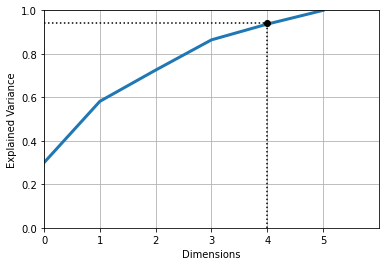

In [50]:
# Plot diagram elbow dgn kumulatif nilai explained ratio sebagai sumbu y dan dimensi sebagai sumbu x
plt.figure(figsize=(6,4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 6, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d-1, d-1], [0, 0.94], "k:")
plt.plot([0, d-1], [0.94, 0.94], "k:")
plt.plot(d-1, 0.94, "ko")
plt.xticks(list(range(0,6)))
plt.grid(True)
plt.show()

Sesuai hasil sebelumnya, 5 dimensi saja cukup. Kita akan melakukan PCA dgn n_components = 5

In [51]:
# Lakukan PCA dgn n_components = 5
pca5 = PCA(n_components=5)
# Fit n transform PCA pada data training
X_train_pca5 = pca5.fit_transform(X_train_vif)

Plot hasi fit n transform PCA pada scatter diagram

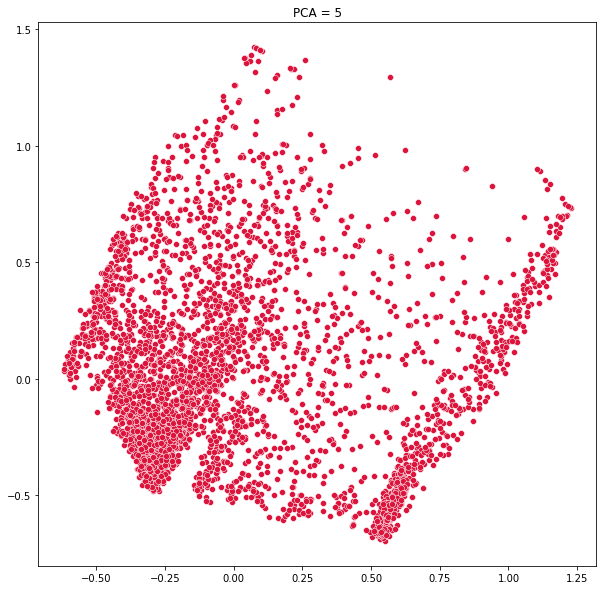

In [52]:
# Buat scatter plot hasil PCA pada training dataset
plt.figure(figsize=(10,10))
plt.title('PCA = 5')
sns.scatterplot(x=X_train_pca5[:,0], y=X_train_pca5[:,1], color="crimson")
plt.show()

Gambar diatas adalah plot antara kolom 0 dan kolom 1 pada dataset hasil PCA. Kombinasi ini hrs dicari dgn trial and error sampai menemukan bentuk cluster pada diagram. Dalam case ini cluster ditemukan pada plot antara kolom 0 dan 1.

Untuk memastikan 5 adalah jumlah dimensi optimal pada PCA, mari kita lakukan plot pada hasil PCA dgn n_components = 4

In [53]:
# Lakukan PCA dgn komponen 4
pca4 = PCA(n_components=4)
X_train_pca4 = pca4.fit_transform(X_train_vif)

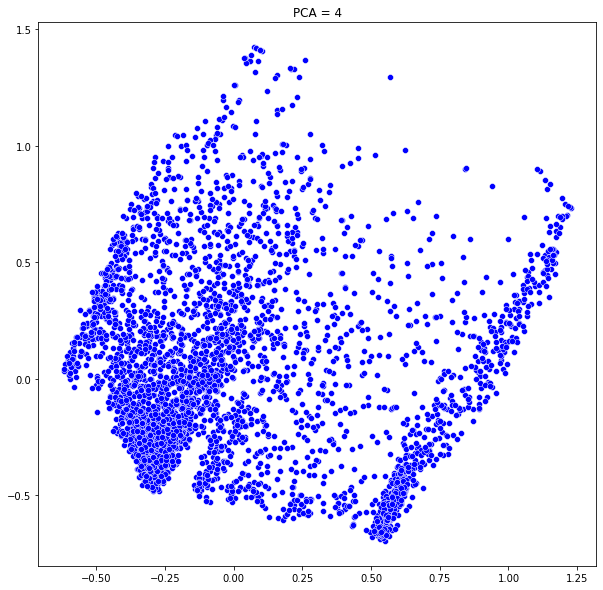

In [54]:
# Buat scatter plot hasil PCA pada training dataset
plt.figure(figsize=(10,10))
sns.scatterplot(x=X_train_pca4[:,0], y=X_train_pca4[:,1], color="blue")
plt.title('PCA = 4')
plt.show()

Hasilnya kurang lbh sama dgn 5 components. Tetapi krn 5 components mengandung 93% informasi vs 86% informasi pada 4 components, maka 5 components akan dipakai

# VI. Model Definition

Bagian ini berisi cell untuk mendefinisikan model. Jelaskan alasan menggunakan suatu algoritma/model, hyperparameter yang dipakai, jenis penggunaan metrics yang dipakai, dan hal lain yang terkait dengan model.

Model yg dicoba adalah K-Means, DBScan, Spectral Clustering dan Agglomerative Clustering

KMEANS

K-Means merupakan algoritma clustering yg mengelompokkan data point berdasarkan jarak terdekatnya dgn centroid cluster. Algoritma ini membutuhkan inisiasi jumlah cluster awal.

Kita akan cari jumlah cluster (k) terbaik utk k-Means. Caranya adlh menggunakan simulasi utk membuat elbow diagram dan silhouette plot. Pertama, kita buat simulasi nilai k utk range 1-10 utk mencari nilai inertia

In [63]:
# Buat simulasi k-Means dgn k antara 1-10
kmeans_per_k_pca5 = [KMeans(n_clusters=k, random_state=42).fit(X_train_pca5)
                for k in range(1, 10)]
inertias_pca5 = [model.inertia_ for model in kmeans_per_k_pca5]

Berikutnya kita akan plot elbow diagram

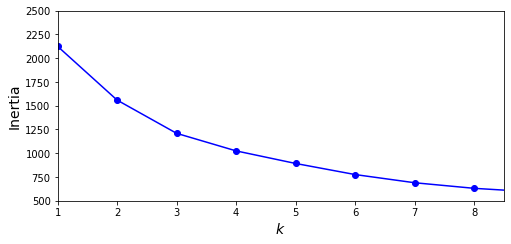

In [64]:
# Plot inersia thd k utk menentukan elbow
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias_pca5, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.axis([1, 8.5, 500, 2500])
plt.show()

Ditemukan pada elbow diagram jika siku terbentuk pada k = 2 dan k = 3. Utk memastikan lagi kita akan plot silhouette score masing nilai k

In [65]:
# Simulasikan silhouette score utk k antara 1-10
silhouette_scores_pca5 = [silhouette_score(X_train_pca5, model.labels_)
                     for model in kmeans_per_k_pca5[1:]]

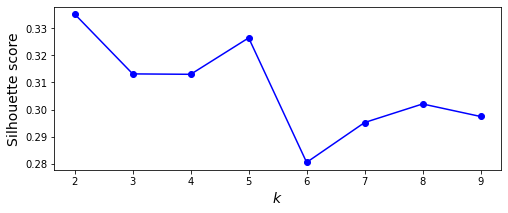

In [66]:
# Plot silhouette score
plt.figure(figsize=(8, 3))
plt.plot(range(2,10), silhouette_scores_pca5, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.show()

Nilai k tertinggi terdapat pada k = 2, kemudian k = 5. Kesimpulannya, k = 2 dipilih krn memenuhi kriteria berdasarkan elbow diagram dan silhouette score

Definisikan model k-Means utk k = 2

In [67]:
# Definiskan model k-means dgn jumlah cluster 2
k = 2
kmeans_pca5 = KMeans(n_clusters=2, random_state=42)

DBSCAN

DBScan merupakan algoritma clustering berbasis densitas cluster. Cluster akan dikelompokkan berdasarkan densitas dari data2 poin, sehingga algoritma ini tdk membutuhkan inisiasi nilai k. Alasan saya memilih DBScan adalah krn algoritma ini memiliki cara kerja yg berbeda dgn k-Means sehingga hasilnya diharapkan berbeda.

Definisikan model DBScan

In [68]:
# Definiskan model DBScan
dbscan_pca5 = DBSCAN()

SPECTRAL CLUSTERING

Algoritma spectral clustering membentuk cluster berdasarkan partisi grafik. Saya memilih algoritma ini krn pada banyak kasus algoritma ini dapat outperform model2 clustering lain. Algoritma ini membutuhkan inisiasi jumlah cluster.

Definisikan model Spectral Clustering

In [69]:
# Definiskan model spectral clustering dgn jumlah cluster 2
sc_pca5 = SpectralClustering(n_clusters=2, random_state=42)

AGGLOMERATIVE CLUSTERING

Agglomerative clustering adalah hierarchy-based algorithm. Algoritma ini akan membuat keputusan melalui dendogram. Data point akan dipecah di dalam dendogram utk dicari perbedaan2nya dgn data poin lain. Point2 yg memiliki kesamaan akan dikelompokkan menjadi satu cluster. Algoritma ini juga membutuhkan inisiasi jumlah cluster.

Definisikan model Agglomerative Clustering

In [70]:
# Definiskan model agglomerative clustering dgn jumlah cluster 2
agc_pca5 = AgglomerativeClustering(n_clusters=2)

# VII. Model Training

Cell pada bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan. Lakukan beberapa kali proses training dengan hyperparameter yang berbeda untuk melihat hasil yang didapatkan. Analisis dan narasikan hasil ini pada bagian Model Evaluation.



KMEANS

Fitting model K-Means pada training dataset

In [71]:
# Fitting model kmeans pada dataset training
kmeans = kmeans_pca5.fit(X_train_pca5)

Tentukan label masing2 cluster pada K-MEans

In [72]:
# Tentukan label masing2 kluster
pd.Series(kmeans.labels_).unique()

array([1, 0], dtype=int32)

Label 0 dan 1 adalah label utk masing cluster. Berikutnya tentukan koordinat utk centroid masing2 cluster

In [73]:
# Tentukan koordinat centroid masing2 cluster
kmeans.cluster_centers_

array([[ 0.65199159, -0.16240637,  0.03115047,  0.11594687, -0.07158668],
       [-0.20150869,  0.05019435, -0.00962756, -0.03583528,  0.02212504]])

DBSCAN

Fitting model DBScan pada training dataset

In [74]:
# Fitting model DBScan pada dataset training
dbscan = dbscan_pca5.fit(X_train_pca5)

Tentukan label masing2 cluster

In [75]:
# Tentukan label masing2 kluster
pd.Series(dbscan.labels_).unique()

array([0])

DBSCan gagal utk mendeteksi adanya cluster pada dataset. Mungkin hal ini disebabkan krn model DBScan menetapkan cluster berdasarkan densitasnya dan persebaran data pada dataset training tidak punya cukup kerapatan utk diidentifikasi sebagai cluster2 yg berbeda

SPECTRAL CLUSTERING

Fitting model Spectral Clustering pada training dataset

In [76]:
# Fitting model spectral clustering pada dataset training
sc = sc_pca5.fit(X_train_pca5)

Tentukan label masing2 cluster

In [77]:
# Tentukan label masing2 kluster
pd.Series(sc.labels_).unique()

array([0, 1], dtype=int32)

Seperti halnya k-Means, Spectral Clustering mendeteksi adanya 2 cluster yg ditandai sebagai label 0 dan 1

AGGLOMERATIVE CLUSTERING

Fitting model Agglomerative Clustering pada training dataset

In [78]:
# Fitting model kmeans pada dataset training
agc = agc_pca5.fit(X_train_pca5)

Tentukan label masing2 cluster

In [79]:
# Tentukan label masing2 kluster
pd.Series(agc.labels_).unique()

array([1, 0])

Seperti halnya k-Means, Agglomerative Clustering mendeteksi adanya 2 cluster yg ditandai sebagai label 0 dan 1

# VIII. Model Evaluation

Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan model. Lakukan analisis terkait dengan hasil pada model dan tuliskan hasil analisisnya.

KMEANS

Terapkan model kMeans clustering pada dataset training utk melakukan pemisahan yg ditandai dgn warna oranye (cluster 1) dan warna biru (cluster 0)

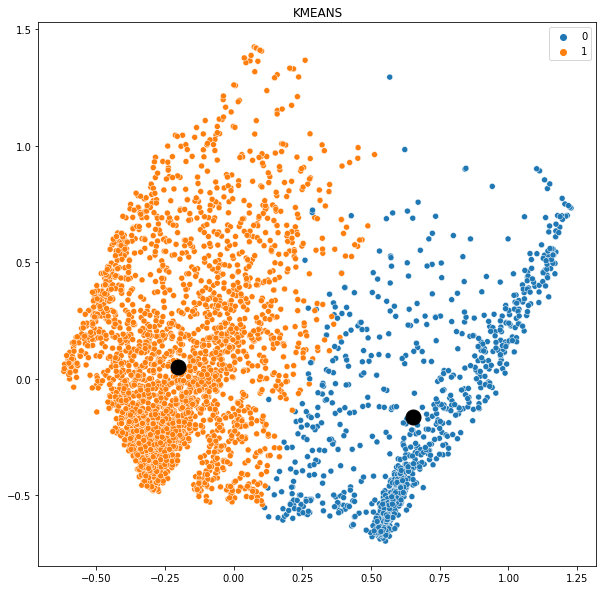

In [80]:
# Lakukan pemisahan cluster menggunakan metode k-Means menjadi label 0 (biru) dan label 1 (orange). Titik bulat hitam adalah centroid dari masing2 cluster
plt.figure(figsize=(10,10))
sns.scatterplot(x=X_train_pca5[:,0], y=X_train_pca5[:,1], hue=kmeans.labels_, color="crimson")
plt.plot(kmeans.cluster_centers_[0][0],kmeans.cluster_centers_[0][1], "ko",markersize=15)
plt.plot(kmeans.cluster_centers_[1][0],kmeans.cluster_centers_[1][1], "ko",markersize=15)
plt.title('KMEANS')
plt.show()

Pemisahan cluster sudah cukup baik, namun ada sedikit point2 yg bercampur dgn cluster lain di dekat decision boundary

DBSCAN

Berikutnya model DBScan akan diterapkan pada clustering training dataset. Namun, hasilnya tidak akan menjadi pemisahan cluster krn DBScan gagal mengidentifikasi adanya cluster.

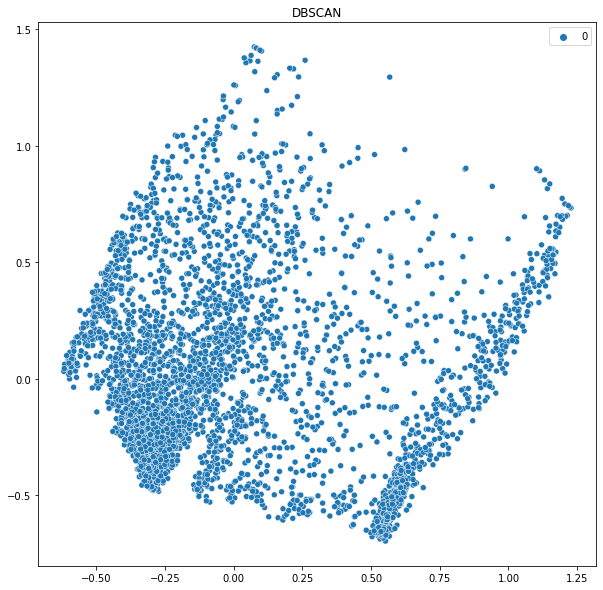

In [81]:
# Lakukan pemisahan cluster menggunakan metode DBScan menjadi label 0 (biru) dan label 1 (orange). Titik bulat hitam adalah centroid dari masing2 cluster
plt.figure(figsize=(10,10))
sns.scatterplot(x=X_train_pca5[:,0], y=X_train_pca5[:,1], hue=dbscan.labels_, color="crimson")
plt.title('DBSCAN')
plt.show()

SPECTRAL CLUSTERING

Terapkan model Spectral Clustering pada dataset training utk melakukan pemisahan yg ditandai dgn warna oranye (cluster 1) dan warna biru (cluster 0)

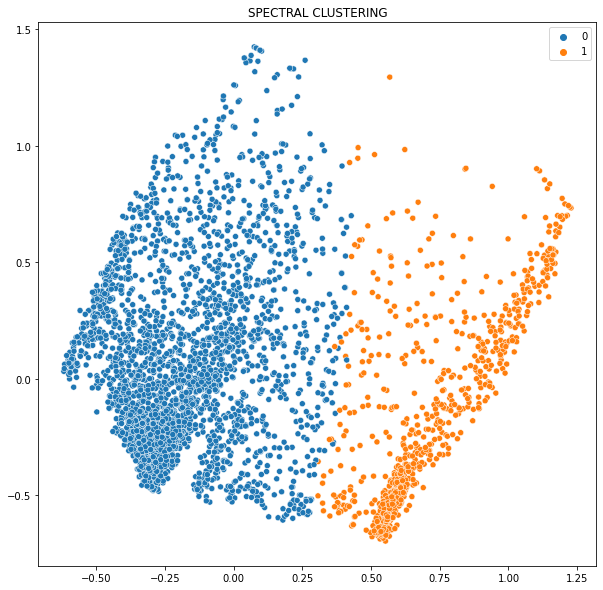

In [82]:
# Lakukan pemisahan cluster menggunakan metode Spectral clustering menjadi label 0 (biru) dan label 1 (orange). Titik bulat hitam adalah centroid dari masing2 cluster
plt.figure(figsize=(10,10))
sns.scatterplot(x=X_train_pca5[:,0], y=X_train_pca5[:,1], hue=sc.labels_, color="crimson")
plt.title('SPECTRAL CLUSTERING')
plt.show()

Pemisahan cukup baik bahkan sedikit lebih baik dibanding k-Means tidak terdapat point2 yg jauh melewati batas decision boundary nya. Namun, performance model ini perlu diuji lagi pada inference set

AGGLOMERATIVE CLUSTERING

Terapkan model Agglomerative clustering pada dataset training.

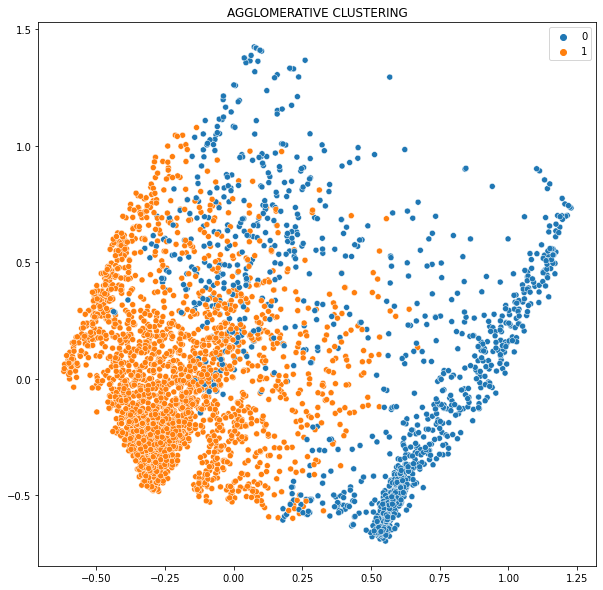

In [83]:
# Lakukan pemisahan cluster menggunakan metode Agglomerative clustering menjadi label 0 (biru) dan label 1 (orange). Titik bulat hitam adalah centroid dari masing2 cluster
plt.figure(figsize=(10,10))
sns.scatterplot(x=X_train_pca5[:,0], y=X_train_pca5[:,1], hue=agc.labels_, color="crimson")
plt.title('AGGLOMERATIVE CLUSTERING')
plt.show()

Pemisahan cukup buruk krn banyak sekali point2 yg bercampur dgn cluster lain di dekat decision boundary. Namun model cukup sukses mengidentifikasi cluster pada point2 yg berada jauh dari centroid cluster di sebelahnya.

# IX. Model Inference

Model yang sudah dilatih akan dicoba pada data yang bukan termasuk ke dalam train-set ataupun test-set. Data ini harus dalam format yang asli, bukan data yang sudah di-scaled.

Lakukan feature selection pada inference set

In [84]:
# Drop kolom TENURE pada dataset inference
X_inf_fs = X_inf.drop(['TENURE'], axis=1)

Lakukan PCA pada inference set

In [85]:
# Lakukan fitting ulang PCA ke dataset inference
X_inf_pca5 = pca5.fit_transform(X_inf_fs)

Lakukan scatterplot pada inference set hasil PCA

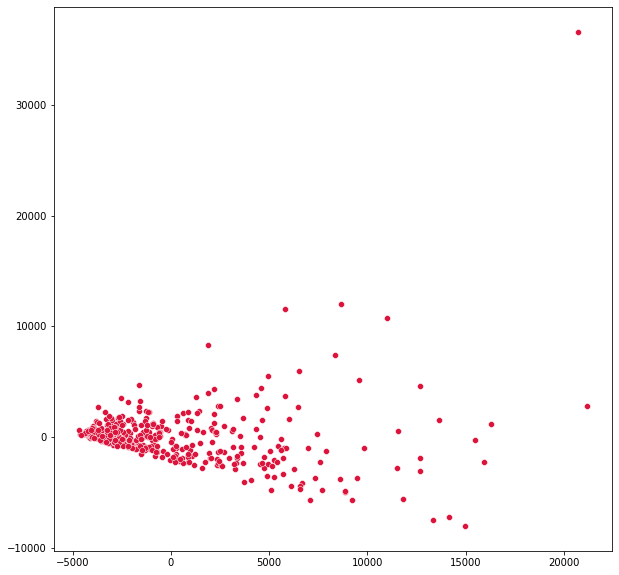

In [86]:
# Buat scatterplot inference set hasil PCA
plt.figure(figsize=(10,10))
sns.scatterplot(x=X_inf_pca5[:,0], y=X_inf_pca5[:,1], color="crimson")
plt.show()

Berbeda dari training set, pada inference set tidak terlihat adanya 2 cluster. Data points terkonsentrasi pada x = -5000 dan x = 0. Hal tsb akan menyulitkan model utk memprediksi cluster. Namun kita lihat apakah ada model yg berhasil dlm memprediksi cluster tsb

KMEANS

Terapkan model k-Means pada inference set

Lakukan fitting model pada inference set

In [87]:
# Fitting model kMeans sebelumnya pada dataset inference
kmeans_inf = kmeans_pca5.fit(X_inf_pca5)

Lakukan plot clustering pada inference set

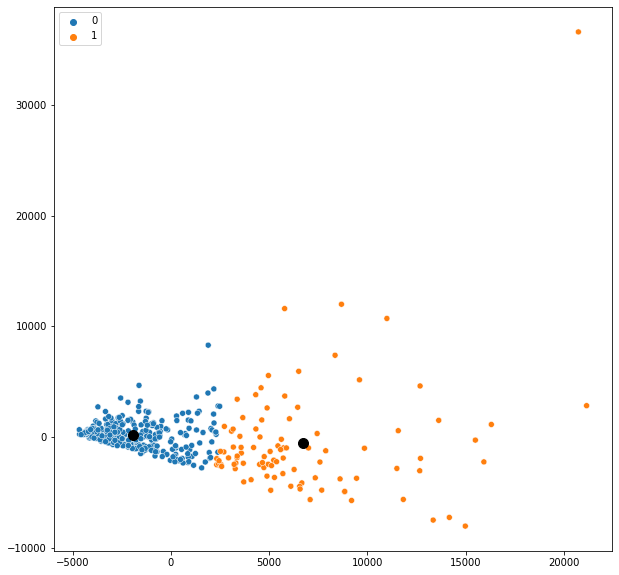

In [88]:
# Lakukan visualisasi utk membedakan cluster pada inference set
plt.figure(figsize=(10,10))
sns.scatterplot(x=X_inf_pca5[:,0], y=X_inf_pca5[:,1], hue=kmeans_inf.labels_, color="crimson")
plt.plot(kmeans.cluster_centers_[0][0],kmeans.cluster_centers_[0][1], "ko",markersize=10)
plt.plot(kmeans.cluster_centers_[1][0],kmeans.cluster_centers_[1][1], "ko",markersize=10)
plt.show()

Model k-Means sukses dalam memisahkan kedua cluster! Bahkan performance ini lbh baik ketika diuji pada training set

DBSCAN

Terapkan model DBScan pada inference set

In [89]:
# Fitting model DBScan sebelumnya pada dataset inference
dbscan_inf = dbscan_pca5.fit(X_inf_pca5)

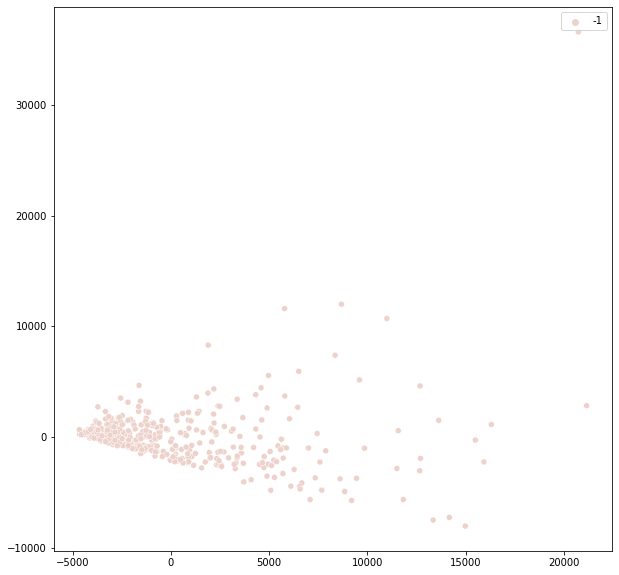

In [90]:
# Lakukan visualisasi utk membedakan cluster pada inference set
plt.figure(figsize=(10,10))
sns.scatterplot(x=X_inf_pca5[:,0], y=X_inf_pca5[:,1], hue=dbscan_inf.labels_, color="crimson")
plt.show()

Seperti sudah diduga sebelumnya, DBScan gagal mengidentifikasi cluster. Bahkan semua point diberikan label -1, artinya poin2 data tsb dianggap sebagai noise

SPECTRAL CLUSTERING

Terapkan model Spectral Clustering pada inference set

In [91]:
# Fitting model Spectral Clustering sebelumnya pada dataset inference
sc_inf = sc_pca5.fit(X_inf_pca5)

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Terlihat jika model mengalami kendala saat melakukan fitting

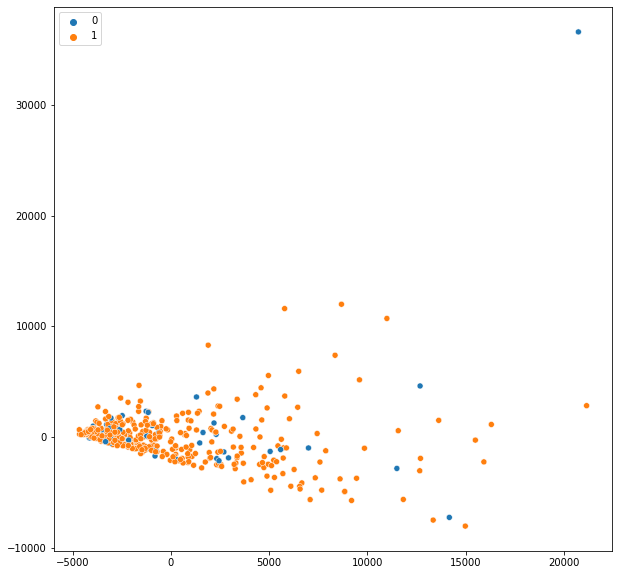

In [92]:
# Lakukan visualisasi utk membedakan cluster pada inference set
plt.figure(figsize=(10,10))
sns.scatterplot(x=X_inf_pca5[:,0], y=X_inf_pca5[:,1], hue=sc_inf.labels_, color="crimson")
plt.show()

Model Spectral Clustering gagal utk memisahkan cluster. Performance model ini dikatakan menurun drastis krn hasil clustering pada training set sudah lbh baik dibandingkan model2 lainnya.

AGGLOMERATIVE CLUSTERING

Terapkan model Agglomerative Clustering pada inference set

Lakukan fitting model

In [93]:
# Fitting model Agglomerative clustering sebelumnya pada dataset inference
agc_inf = agc_pca5.fit(X_inf_pca5)

Plot cluster dlm scatter diagram

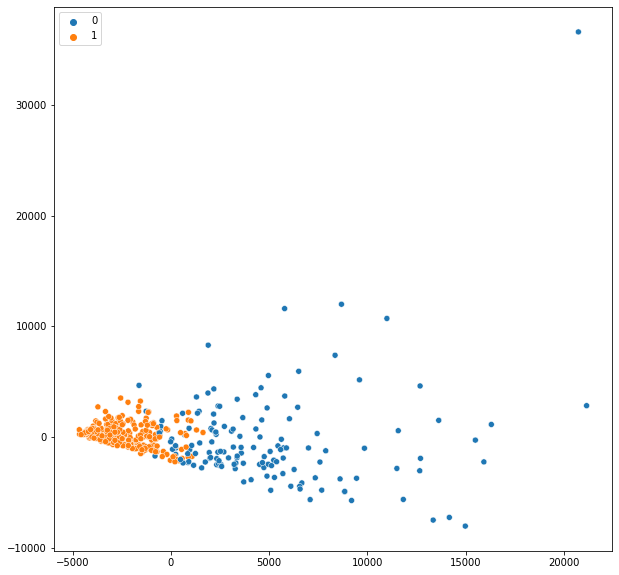

In [94]:
# Lakukan visualisasi utk membedakan cluster pada inference set
plt.figure(figsize=(10,10))
sns.scatterplot(x=X_inf_pca5[:,0], y=X_inf_pca5[:,1], hue=agc_inf.labels_, color="crimson")
plt.show()

Model mampu memisahkan cluster pada inference set, namun hasilnya tidak sebaik k-Means. Bisa dikatakan model ini tdk mengalami banyak perubahan ketika diuji pada training set dan inference set

# X. Kesimpulan

Berdasarkan hasil EDA, user bersikap rasional dlm berbelanja. Pada saat user memiliki balance kredit di akunnya, user tetap berusaha membayar sesedikit mungkin. Bahkan user lbh memilih untuk mencicil daripada membayar tunai (oleh krn itu mereka memakai kartu kredit!). Di sisi lain, peningkatan nilai credit limit dapat mendorong user utk semakin sering berbelanja.

Metode PCA dapat mereduksi dimensi dari 6 menjadi 5 dimensi. Penggunaan 5 dimensi sudah meng-cover 93% informasi dari seluruh kolom dataset.

Jumlah cluster optimal berdasarkan elbow method dan silhouette score adalah 2. Model k-Means dgn jumlah cluster 2 berhasil mendeteksi perbedaan cluster pada training set dgn baik namun beberapa data point masih berada di luar decision boundary. Namun, hasil lbh baik diperoleh pada inference set. Sebaliknya, spectral clustering memiliki performance sangat baik pada training set namun gagal ketika diterapkan pada inference set. Kegagalan ini disebabkan oleh error pada model, sehingga perlu mengetahui lebih lanjut performance dari model ini yg sebenarnya. Kemudian agglomerative clustering berhasil memisahkan cluster menjadi 2 namun banyak sekali data point yg keluar dari decision boundary dan bercampur dgn cluster lain. Hasil ini sama saja ketika diuji pada inference set, sehingga model ini cukup buruk utk diterapkan pada kasus ini.

Model berbasis seperti DBScan gagal utk menemukan cluster pada pola scatter data berdensitas rendah. Pada inference set dgn sampel hanya 10% dari dataset, seluruh data points dikategorikan sebagai noise. Ini berarti DBSCan hanya cocok diterapkan pada dataset yg memilikk densitas cluster yg tinggi.

Secara keseluruhan, model k-Means adalah model terbaik utk kasus ini, dimana karakteristik cluster adalah non-spherical dan low density.


# Conceptual Problems

1. Apakah yang dimaksud dengan inertia pada algoritma K-Means ?

  Inertia adalah penjumlahan kuadrat antara selisih masing2 data point dgn 
  titik centroidnya. Secara matematis inertia dinyatakan oleh:


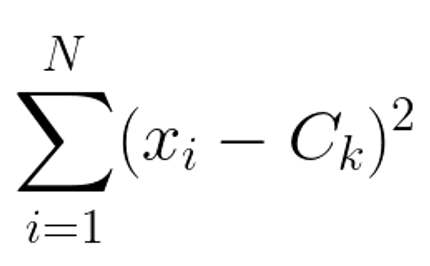



  Nilai inersia yg optimal pada k-Means dapat ditentukan melalui siku pada  
  elbow diagram yg merupakan plot antara inertia (y axis) thd k (x axis)

2. Jelaskan yang dimaksud dengan Elbow Method (alasan penggunaan, cara penggunaan, kelemahan/kelebihan, dll) !

Elbow method adalah cara menentukan nilai k yg optimal pada k-Means melalui plot antara nilai inertia terhadap k. Elbow method digunakan krn algoritma k-Means membutuhkan nilai k (jumlah cluster) yg ditentukan scr manual utk inisiasinya. Ada banyak pilihan k, namun hanya ada satu nilai k yg optimal. Nilai k yg optimal tsb dicari pada elbow diagram pada titik dmn penurunan nilai inersia terhadap k melambat. Sehingga terlihat bentuk siku pada grafik. Jika terdapat lbh dari satu siku pada elbow diagram, siku yg lbh rendah dipilih. Kelebihan metode ini adalah cukup sederhana utk diterapkan. Kelemahan dari metode ini adalah hanya mendeteksi secara kualitatif sehingga terkesan kurang subjektif. Biasanya perlu alternatif lain utk memilih nilai k yg optimal, seperti menggunakan Silhouette Score.

Selain pada k-means, elbow method jg diterapkan pada PCA utk mendeteksi nilai dimensi yg optimal pada plot antara explained_variance dan n dimensi. Metodenya hampir sama seperti pada k-Means. Bedanya adalah bentuk grafik pada plot explained variance yg concave, sehingga siku ditentukan ketika kenaikan explained variance melambat.


3. Jelaskan perbedaan masing-masing algoritma clustering yang anda gunakan dalam kasus ini !

Algoritma k-Means menggunakan jarak data2 point terhadap titik centroidnya dalam menentukan klasifikasi data tsb pada suatu cluster. Algoritma Spectral Clustering menggunakan proses graph-partitioning untuk klasifikasi cluster. Algoritma Agglomerative Clustering menggunakan hierarki dlm bentuk dendogram utk klasifikasi cluster. Tiap data point akan dicari perbedaannya dgn data point lain menggunakan decision hierarchy. Poin2 dgn kemiripan paling besar akan dikelompokkan menjadi satu cluster. Algoritma DBScan menggunakan densitas hasil scatter data point utk menentukan jumlah cluster dan klasifikasi cluster.

Algoritma k-Means, Spectral dan Agglomerative membutuhkan inisiasi nilai awal jumlah cluster, sehingga jumlah cluster bisa ditentukan secara manual. Sebaliknya, DBScan tdk membutuhkan inisiasi jumlah cluster krn clustering ditentukan berdasarkan kerapatan data.